# Importing libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [89]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


### Confrim that there is no null values

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### `customerID`

🔹 A unique alphanumeric code given to each customer
🔹 Works like a roll number — just an identifier
🔸 Not useful for prediction (we usually drop this column)

---

### `gender`

🔹 Whether the customer is **Male** or **Female**
🔹 Sometimes used to check if one gender churns more than the other
📝 Not always strongly related to churn

---

### `SeniorCitizen`

🔹 Whether the customer is a senior (age 65+)

* `1` = Senior citizen
* `0` = Not a senior
  🔎 Seniors may have different service needs or churn patterns

---

### `Partner`

🔹 Does the customer have a spouse or live-in partner?

* `Yes` / `No`
  🔎 Customers with partners often stay longer (lower churn)

---

### `Dependents`

🔹 Does the customer financially support dependents? (kids, parents, etc.)

* `Yes` / `No`
  🔎 People with dependents may need more stable services → lower churn

---

### `tenure`

🔹 How long the customer has been with the company (in **months**)
🔸 Low tenure (new customers) → more likely to churn
🔸 High tenure (loyal customers) → less likely to churn

---

### `PhoneService`

🔹 Whether the customer has telephone service

* `Yes` / `No`
  🔎 Some customers may only use internet service, not phone

---

### `MultipleLines`

🔹 Whether the customer has **multiple phone lines** in their account

* `Yes`
* `No`
* `No phone service` (if PhoneService = No)

---

### `InternetService`

🔹 Type of internet connection customer is subscribed to

* `DSL` (slow)
* `Fiber optic` (fast)
* `No internet`
  📌 Fiber customers often churn more if service is expensive

---

### `OnlineSecurity`

🔹 Extra paid service for online protection from cyber threats

* `Yes` / `No` / `No internet service`
  📌 People without security add-ons may churn faster

---

### `OnlineBackup`

🔹 Extra service for automatic data backup to cloud

* `Yes` / `No` / `No internet service`

---

### `DeviceProtection`

🔹 Insurance / protection plan for devices connected to the internet

* `Yes` / `No`
  📌 Extra services usually mean better retention

---

### `TechSupport`

🔹 Whether customer has 24/7 tech support add-on

* `Yes` / `No`
  📌 Customers without support might leave when problems occur

---

### `StreamingTV`

🔹 Whether customer has streaming TV via the internet

* `Yes` / `No` / `No internet service`

---

### `StreamingMovies`

🔹 Whether customer has streaming movie add-on

* `Yes` / `No`

---

### `Contract`

🔹 Type of subscription agreement

* `Month-to-month` (easy to cancel → high churn)
* `One year`
* `Two year` (long commitment → low churn)

📌 **Most important churn indicator** — month-to-month customers churn the most.

---

### `PaperlessBilling`

🔹 Whether bill is received digitally instead of paper

* `Yes` / `No`
  📌 Sometimes linked with online payment → may affect churn

---

### `PaymentMethod`

🔹 How the customer pays

* Credit card
* Bank transfer
* Electronic check
* Mailed check
  📌 People paying by **electronic check** churn the most (from dataset analysis)

---

### `MonthlyCharges`

🔹 How much customer pays **per month (₹ or $)**
✅ Higher charges sometimes cause dissatisfaction → churn risk increases

---

### `TotalCharges`

🔹 Total money the customer has paid **so far**
📌 Depends on `tenure × MonthlyCharges`
🔎 Low total charge = new customer

---

### `Churn` ✅ **Target column**

🔹 Did the customer leave the service?

* `Yes` → customer stopped subscription
* `No` → customer stayed
  🎯 This is what we are predicting using machine learning


In [90]:
# droping customer id
df = df.drop('customerID',axis = 1)

In [8]:
#label encoding 
df_dummies = pd.get_dummies(data = df,dtype=int,drop_first=True)

In [9]:
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [10]:
# checking correlated variables to target column churn
df_corr = df_dummies.corr()['Churn_Yes'].sort_values(ascending=False)
df_corr 

Churn_Yes                                1.000000
InternetService_Fiber optic              0.307463
PaymentMethod_Electronic check           0.301455
MonthlyCharges                           0.192858
PaperlessBilling_Yes                     0.191454
SeniorCitizen                            0.150541
StreamingTV_Yes                          0.063254
StreamingMovies_Yes                      0.060860
MultipleLines_Yes                        0.040033
PhoneService_Yes                         0.011691
gender_Male                             -0.008545
MultipleLines_No phone service          -0.011691
DeviceProtection_Yes                    -0.066193
OnlineBackup_Yes                        -0.082307
PaymentMethod_Mailed check              -0.090773
PaymentMethod_Credit card (automatic)   -0.134687
Partner_Yes                             -0.149982
Dependents_Yes                          -0.163128
TechSupport_Yes                         -0.164716
OnlineSecurity_Yes                      -0.171270


In [11]:
df_corr.sort_values(ascending=False).head(6)

Churn_Yes                         1.000000
InternetService_Fiber optic       0.307463
PaymentMethod_Electronic check    0.301455
MonthlyCharges                    0.192858
PaperlessBilling_Yes              0.191454
SeniorCitizen                     0.150541
Name: Churn_Yes, dtype: float64

### InternetService_Fiber optic and PaymentMethod_Electronic is the positve correlated to churn_yes.

In [14]:
df_corr.sort_values(ascending=False).tail(5)

TechSupport_No internet service        -0.227578
DeviceProtection_No internet service   -0.227578
StreamingTV_No internet service        -0.227578
Contract_Two year                      -0.301552
tenure                                 -0.354049
Name: Churn_Yes, dtype: float64

### tenure and Contract_Two year is the negative correlated to churn_yes.                           

<Axes: xlabel='Churn', ylabel='count'>

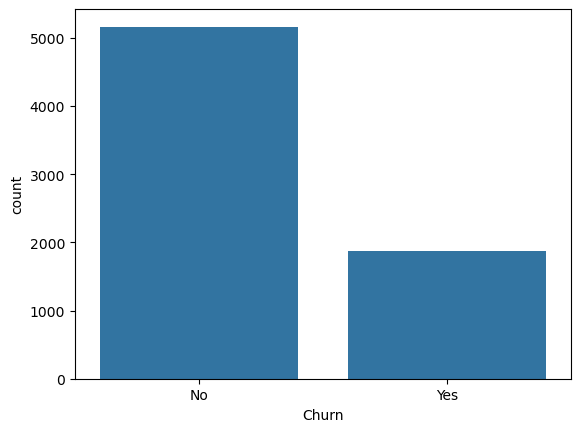

In [15]:
# check the target is imbalanced or not
sns.countplot(data = df,x='Churn')

<Axes: xlabel='TotalCharges', ylabel='Count'>

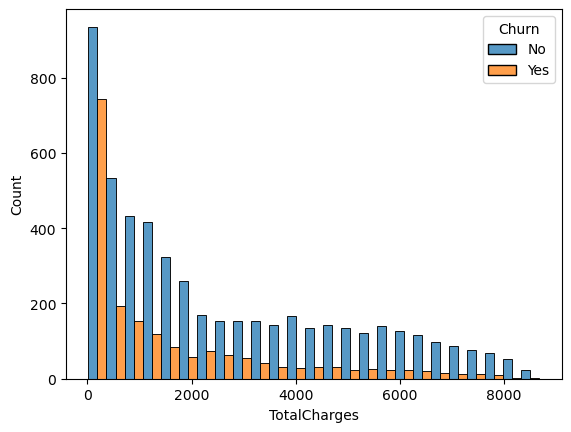

In [16]:
sns.histplot(data = df,x = 'TotalCharges',hue='Churn',multiple='dodge')

<Axes: xlabel='TotalCharges'>

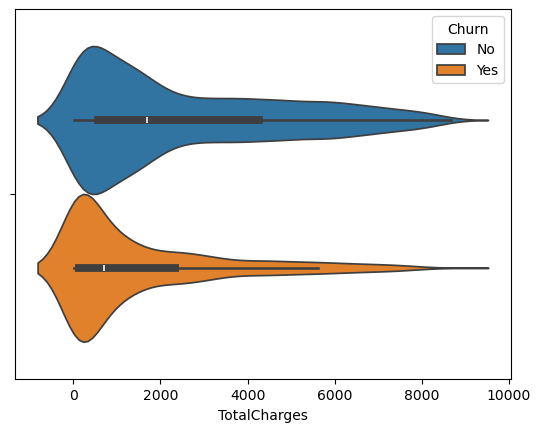

In [17]:
sns.violinplot(data = df, x = 'TotalCharges',hue = 'Churn')

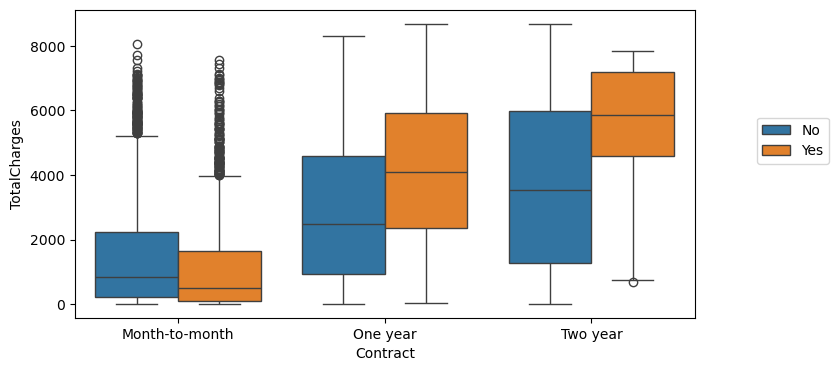

In [18]:
plt.figure(figsize=(8,4))
sns.boxplot(data = df, x = 'Contract',y = 'TotalCharges',hue = 'Churn')
plt.legend(loc=(1.1,0.5))

In [19]:
df_corr

Churn_Yes                                1.000000
InternetService_Fiber optic              0.307463
PaymentMethod_Electronic check           0.301455
MonthlyCharges                           0.192858
PaperlessBilling_Yes                     0.191454
SeniorCitizen                            0.150541
StreamingTV_Yes                          0.063254
StreamingMovies_Yes                      0.060860
MultipleLines_Yes                        0.040033
PhoneService_Yes                         0.011691
gender_Male                             -0.008545
MultipleLines_No phone service          -0.011691
DeviceProtection_Yes                    -0.066193
OnlineBackup_Yes                        -0.082307
PaymentMethod_Mailed check              -0.090773
PaymentMethod_Credit card (automatic)   -0.134687
Partner_Yes                             -0.149982
Dependents_Yes                          -0.163128
TechSupport_Yes                         -0.164716
OnlineSecurity_Yes                      -0.171270


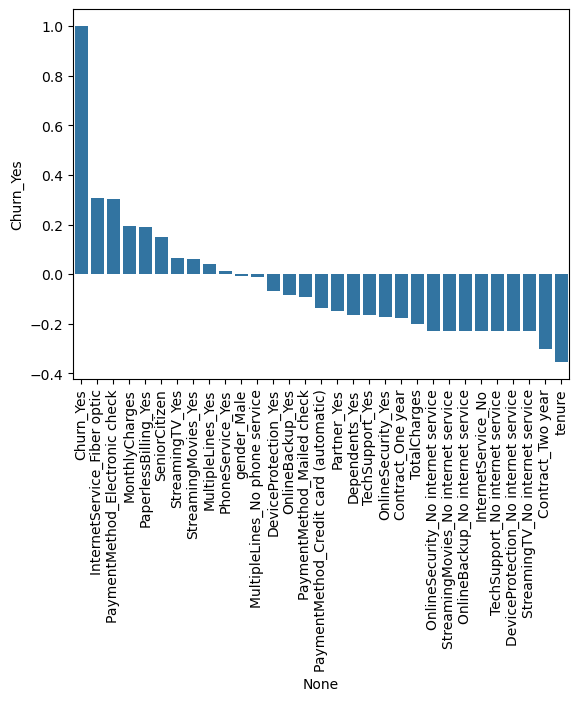

In [20]:
sns.barplot(x = df_corr.index,y = df_corr)
plt.xticks(rotation = 90);

In [21]:
# contract types
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

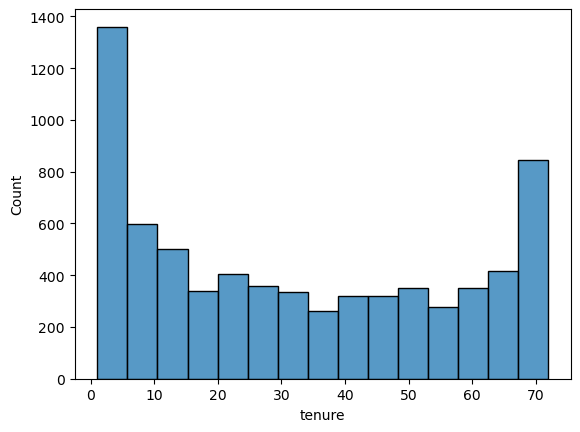

In [22]:
sns.histplot(data = df,x = 'tenure');

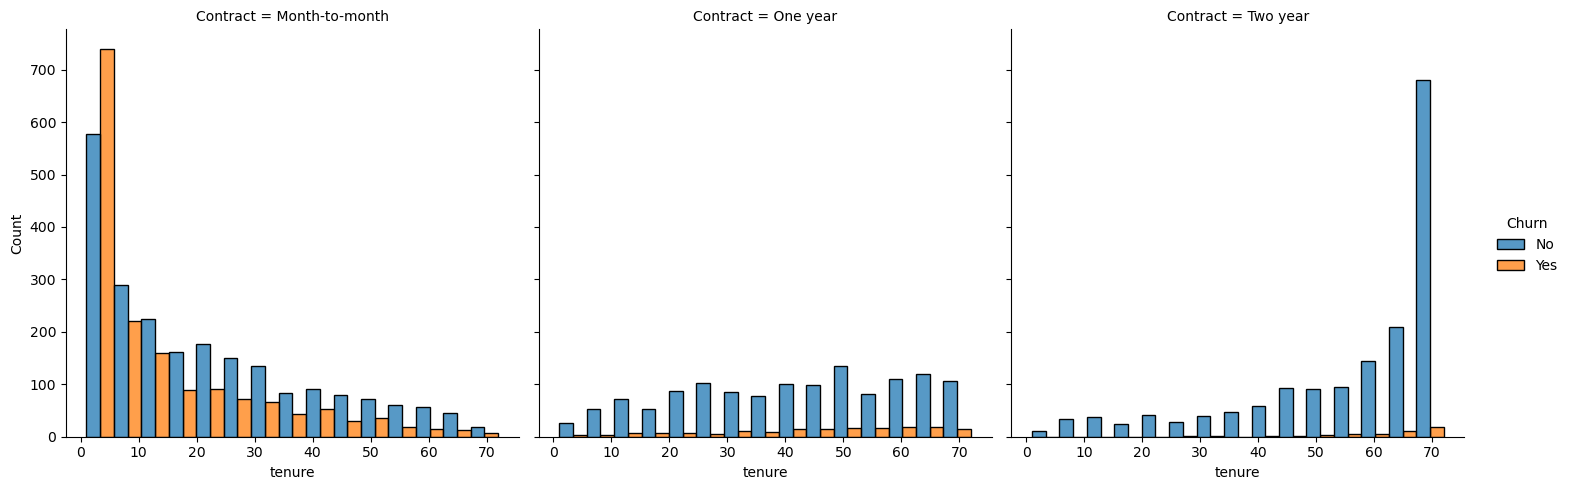

In [23]:
sns.displot(data = df,x = 'tenure',hue = 'Churn',col='Contract',multiple = 'dodge');

In [24]:
# from above we get that month to month subcriptions peoples are churning or quiting .

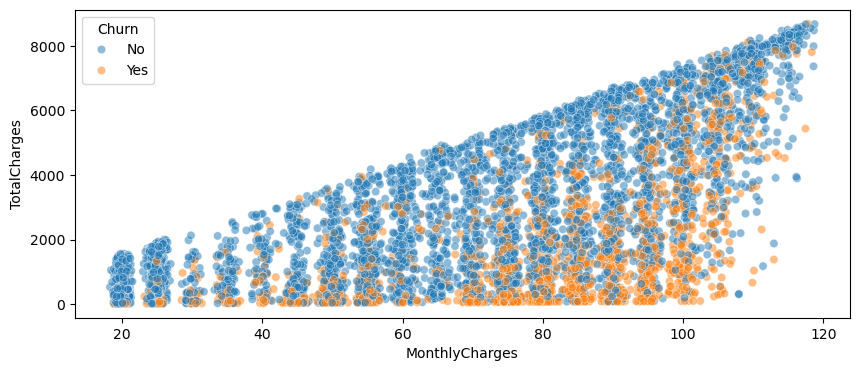

In [25]:
plt.figure(figsize=(10,4))
sns.scatterplot(data = df, x = 'MonthlyCharges',y = 'TotalCharges',hue = 'Churn',alpha = 0.5);

In [26]:
#from this we get it that monthly charges with total charges less are most likely to churn

In [27]:
df['tenure'].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64

In [28]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [29]:
churn_rate = 100 * yes_churn / (no_churn+yes_churn)

In [30]:
churn_rate = churn_rate.transpose()['SeniorCitizen']

In [31]:
# above we get  for 1 tenure means 1 month we get 61 % churn and 72 month only 1.5% churn

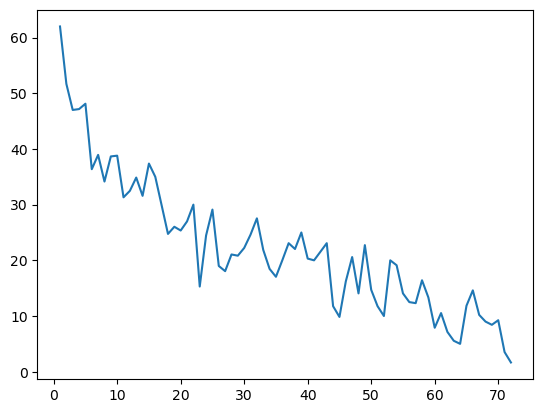

In [32]:
plt.plot(churn_rate.index,churn_rate)

In [33]:
churn_rate

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: SeniorCitizen, Length: 72, dtype: float64

In [35]:
def conhort(tenure):
    if tenure<13:
        return '0-12 Months'
    elif tenure<25:
        return '12-24 Months'
    elif tenure<49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'
    

In [36]:
df['conhort_tenure'] = df['tenure'].apply(conhort)

In [37]:
df[['tenure','conhort_tenure']]

,tenure,conhort_tenure
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
...,...,...
7027,24,12-24 Months
7028,72,Over 48 Months
7029,11,0-12 Months
7030,4,0-12 Months


In [94]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

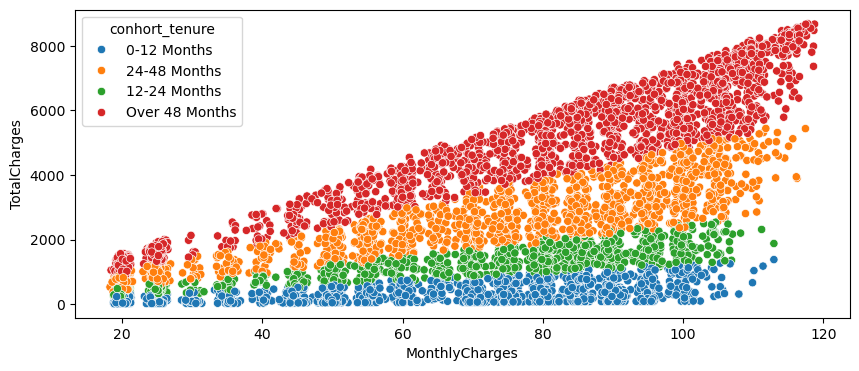

In [39]:
plt.figure(figsize=(10,4))
sns.scatterplot(data = df,x = 'MonthlyCharges',y = 'TotalCharges',hue = 'conhort_tenure')

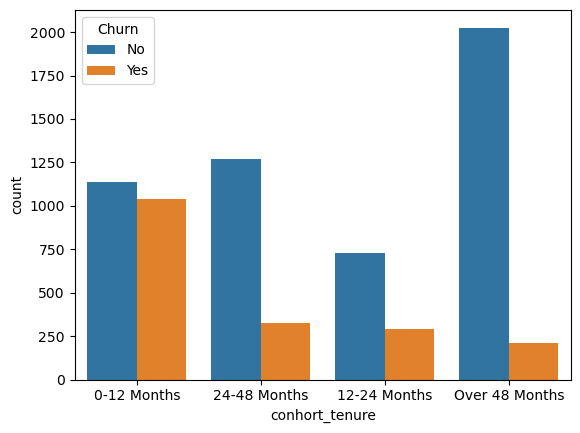

In [40]:
sns.countplot(data = df,x = 'conhort_tenure',hue='Churn');

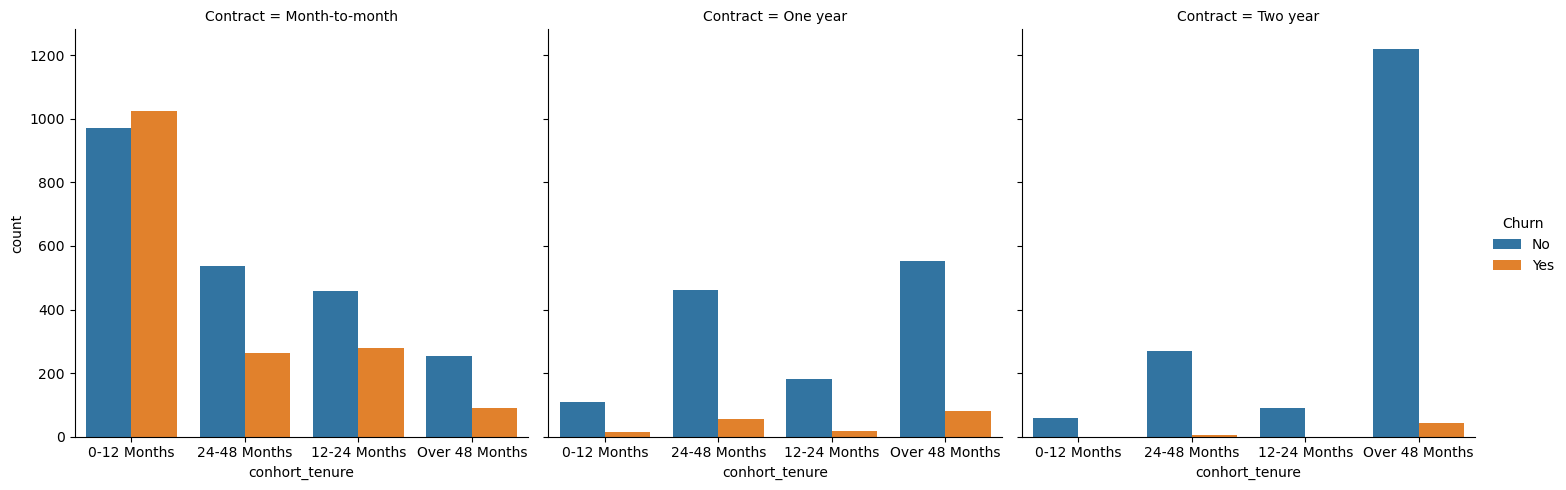

In [41]:
sns.catplot(data=df,x='conhort_tenure',hue='Churn',col='Contract',kind='count');

# Model Selection

# Classification models
  1. logistic regression
  2. knn
  3. svm
  4. decision trees
  5. random forest
  6. gradient boosting
  7. ada boosting

In [42]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# data pre-processing

In [91]:
y = df['Churn']

In [102]:
X = df.drop(['Churn','gender'],axis = 1)

In [104]:
X = pd.get_dummies(X,dtype=int,drop_first=True)

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [107]:
models = {'logistic_regression':LogisticRegressionCV(),
          'knn':KNeighborsClassifier(),
          'svc':SVC(),
          'Dtree':DecisionTreeClassifier(),
          'rfc':RandomForestClassifier(),
          'gb':GradientBoostingClassifier(),
          'Ada':AdaBoostClassifier()}

In [108]:
for name,model in models.items():
    model.fit(X_train,y_train)
    print(f"{name} is trained")

C:\Users\Aswin K U\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Aswin K U\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

logistic_regression is trained
knn is trained
svc is trained
Dtree is trained
rfc is trained
gb is trained
Ada is trained


# Model Evaluation

## This involves 
   1. Classification report
   2. confusion matrix

In [110]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [53]:
# classification_report(y_test,y_pred)
# # confusion_matrix(y_test,y_pred)

In [111]:
for name,model in models.items():
    y_pred = model.predict(X_test)
    
    print(f"{name} confusion_matrix : \n")
    print(confusion_matrix(y_test,y_pred))

    print('\n')
    print(classification_report(y_test,y_pred))

logistic_regression confusion_matrix : 

[[689  82]
 [145 139]]


              precision    recall  f1-score   support

          No       0.83      0.89      0.86       771
         Yes       0.63      0.49      0.55       284

    accuracy                           0.78      1055
   macro avg       0.73      0.69      0.70      1055
weighted avg       0.77      0.78      0.78      1055

knn confusion_matrix : 

[[678  93]
 [161 123]]


              precision    recall  f1-score   support

          No       0.81      0.88      0.84       771
         Yes       0.57      0.43      0.49       284

    accuracy                           0.76      1055
   macro avg       0.69      0.66      0.67      1055
weighted avg       0.74      0.76      0.75      1055

svc confusion_matrix : 

[[771   0]
 [284   0]]


              precision    recall  f1-score   support

          No       0.73      1.00      0.84       771
         Yes       0.00      0.00      0.00       284

    accuracy    

C:\Users\Aswin K U\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aswin K U\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aswin K U\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# we got ada boost permfoed well.

In [ ]:
#hyper tuning

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=101)

In [114]:
param_grid = {
    'estimator__max_depth': [1, 2, 3],
    'n_estimators': [50, 100, 200, 300,500],
    'learning_rate': [0.01, 0.1, 0.5,0.3,0.4,0.6,1.0]
}

In [115]:
from sklearn.metrics import make_scorer, recall_score

In [116]:
recall_scorer = make_scorer(recall_score, pos_label='Yes')

In [117]:
grid_model = GridSearchCV(ada,param_grid,cv=5,n_jobs=-1,scoring=recall_scorer) 

In [118]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(),
                                          random_state=101),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [1, 2, 3],
                         'learning_rate': [0.01, 0.1, 0.5, 0.3, 0.4, 0.6, 1.0],
                         'n_estimators': [50, 100, 200, 300, 500]},
             scoring=make_scorer(recall_score, response_method='predict', pos_label=Yes))

In [119]:
grid_model.best_params_

{'estimator__max_depth': 2, 'learning_rate': 1.0, 'n_estimators': 300}

In [120]:
y_pred = grid_model.predict(X_test)

In [121]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.83      0.89      0.86       771
         Yes       0.63      0.51      0.56       284

    accuracy                           0.79      1055
   macro avg       0.73      0.70      0.71      1055
weighted avg       0.78      0.79      0.78      1055



In [122]:
grid_model.best_estimator_.feature_importances_.argmax()


np.int64(3)

In [123]:
X.columns[3]

'TotalCharges'

In [124]:
feature_importances = pd.Series(
    grid_model.best_estimator_.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print(feature_importances)


TotalCharges                             0.340300
tenure                                   0.194015
MonthlyCharges                           0.112963
InternetService_Fiber optic              0.089883
Contract_Two year                        0.080181
PaymentMethod_Electronic check           0.026942
OnlineSecurity_Yes                       0.019046
OnlineBackup_No internet service         0.018620
Contract_One year                        0.017297
PhoneService_Yes                         0.015040
MultipleLines_No phone service           0.012592
TechSupport_Yes                          0.012393
TechSupport_No internet service          0.011372
PaperlessBilling_Yes                     0.009870
Dependents_Yes                           0.009356
PaymentMethod_Credit card (automatic)    0.008617
StreamingMovies_Yes                      0.005794
SeniorCitizen                            0.004377
StreamingMovies_No internet service      0.004367
MultipleLines_Yes                        0.003186


In [125]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [126]:
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=2),
    n_estimators=500,
    learning_rate=0.5,
    random_state=42
)

In [127]:
ada.fit(X_res,y_res)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.5, n_estimators=500, random_state=42)

In [139]:
probs = ada.predict_proba(X_test)[:,1]
y_pred = np.where(probs > 0.475, 'Yes', 'No') 

In [140]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.91      0.68      0.78       771
         Yes       0.49      0.82      0.61       284

    accuracy                           0.72      1055
   macro avg       0.70      0.75      0.70      1055
weighted avg       0.80      0.72      0.73      1055



In [130]:
from sklearn.metrics import roc_auc_score

In [141]:
roc_auc_score(y_test,probs)

np.float64(0.8195730805063846)

In [137]:
import pickle

model_data = {
    "model": ada,
    "threshold": 0.475
}

with open("ada_bundle.pkl", "wb") as f:
    pickle.dump(model_data, f)


## If the model predicts a customer will churn, it indicates a high risk of churn, but it’s not certain — historically, about 49% of predicted churners actually churned, and the model correctly identifies 82% of all actual churners